# Clean correlational study pilot data
*Author*: Tianhao Qin

*Date*: 03/28/2024

In [74]:
# import pandas as pd
# import numpy as np
# import os
# import glob

In [75]:
import os

# define path
scriptpath = os.path.abspath('') # path to this script

# Go back twice to get the root path
# rootpath = os.path.dirname(os.path.dirname(scriptpath))
rootpath = scriptpath # In current setting, the working directory is the script's directory
rootpath

'c:\\Users\\tianh\\Documents\\GitHub\\YESLab-RA-training\\Naodao'

In [76]:
# load data
import re
import glob
import pandas as pd

# guilt
filename_pattern = re.compile(r'.*interactive game.*Psychopy.csv')
dfs_guilt = []
filename_guilt = [f for f in glob.glob(os.path.join(rootpath, 'data', '*')) if filename_pattern.match(f)]
# read in the data according to the filename
for f in filename_guilt:
    try:
        dfs_guilt.append(pd.read_csv(f))
    except:
        print(f"Error occur when loading:{f}")

# trait
dfs_trait = []
filename_pattern = re.compile(r'.*judgment task.*Psychopy.csv')
filename_trait = [f for f in glob.glob(os.path.join(rootpath, 'data', '*')) if filename_pattern.match(f)]
for f in filename_trait:
    try:
        dfs_trait.append(pd.read_csv(f))
    except:
        print(f"Error occur when loading:{f}")



### check sample size

In [77]:
print(f"participants in guilt: {len(filename_guilt)}, participant in trait: {len(filename_trait)}")


participants in guilt: 19, participant in trait: 19


## Pre-survey

In [78]:
def extract_col(df, colname_pattern):
    """
    Extract columns with the specified pattern from the DataFrame
    """
    # Filter columns based on the specified patterns
    columns_to_select = [col for col in df.columns if any(pattern in col for pattern in colname_pattern)]

    # Create the anxiety DataFrame
    df_out = df[columns_to_select]

    # if df_out.shape[1] < colname_pattern.__len__():
    #     print(f"Warning: Not all columns with the pattern {colname_pattern} are found in the DataFrame")

    # Remove rows where participantID is NaN
    if 'participantIDque' in df_out.columns:
        df_out = df_out.dropna(subset=['participantIDque'])
    elif 'naodao_id' in df_out.columns:
        df_out = df_out.dropna(subset=['naodao_id'])
    elif 'participant' in df_out.columns and df_out.shape[1] < colname_pattern.__len__():
        print(f"{df_out['participant'][0]} has missing columns")

    return df_out

In [79]:
pre_survey = pd.read_csv(glob.glob(os.path.join(rootpath, 'data', 'SAD_presurvey_CN_June 3, 2024_09.29.csv'))[0])

In [80]:
pre_survey_clean = extract_col(pre_survey, 
                               ['ResponseID', 'naodao_id', 'Gender', 'Gender_5_TEXT', 'Q6', 'Q7', 'Q7_2_TEXT', 
                                'Q9'])
# pre_survey_clean

In [81]:
# Check if the DataFrame looks correct
print(pre_survey_clean.head())

                       Gender                Gender_5_TEXT  \
0  您的性别认同是？ - Selected Choice  您的性别认同是？ - 其他（请具体说明） - Text   
1         {"ImportId":"QID3"}   {"ImportId":"QID3_5_TEXT"}   
5                          女性                          NaN   
6                         NaN                          NaN   
7                         NaN                          NaN   

                         Q6                       Q7  \
0                 您的年龄（年）？：  您的民族？ - Selected Choice   
1  {"ImportId":"QID6_TEXT"}      {"ImportId":"QID7"}   
5                       NaN                      NaN   
6                       NaN                      NaN   
7                       NaN                      NaN   

                    Q7_2_TEXT                   Q9                 naodao_id  
0    您的民族？ - 少数民族（请注明） - Text           您的最高学历是什么？                 naodao_id  
1  {"ImportId":"QID7_2_TEXT"}  {"ImportId":"QID9"}  {"ImportId":"naodao_id"}  
5                         NaN                  NaN   

## Post-survey

In [82]:

post_survey = pd.read_csv(glob.glob(os.path.join(rootpath, 'data', 'SAD_Post_Questionnaire_CN_June 3, 2024_09.30.csv'))[0])

# show
post_survey.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,liebowitz#2_19,liebowitz#2_20,liebowitz#2_21,liebowitz#2_22,liebowitz#2_23,liebowitz#2_24,Q10,Q11,status,naodao_id
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,下面这个量表会测量不同情景下社交焦虑对你生活的影响。请仔细阅读每种情况，并回答两个问题：第一...,下面这个量表会测量不同情景下社交焦虑对你生活的影响。请仔细阅读每种情况，并回答两个问题：第一...,下面这个量表会测量不同情景下社交焦虑对你生活的影响。请仔细阅读每种情况，并回答两个问题：第一...,下面这个量表会测量不同情景下社交焦虑对你生活的影响。请仔细阅读每种情况，并回答两个问题：第一...,下面这个量表会测量不同情景下社交焦虑对你生活的影响。请仔细阅读每种情况，并回答两个问题：第一...,下面这个量表会测量不同情景下社交焦虑对你生活的影响。请仔细阅读每种情况，并回答两个问题：第一...,您认为我们的研究是关于什么的？,为了帮助我们改进研究设置，您有什么意见或建议吗？,status,naodao_id
1,"{""ImportId"":""startDate"",""timeZone"":""America/Lo...","{""ImportId"":""endDate"",""timeZone"":""America/Los_...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID10#2_114""}","{""ImportId"":""QID10#2_115""}","{""ImportId"":""QID10#2_116""}","{""ImportId"":""QID10#2_117""}","{""ImportId"":""QID10#2_118""}","{""ImportId"":""QID10#2_119""}","{""ImportId"":""QID13_TEXT""}","{""ImportId"":""QID14_TEXT""}","{""ImportId"":""QSEDstatus""}","{""ImportId"":""naodao_id""}"
2,2024-05-13 20:09:46,2024-05-13 20:10:50,IP Address,169.231.116.246,100,64,True,2024-05-13 20:10:51,R_1fenaUBS3HK5kfc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,preview
3,2024-05-14 00:33:27,2024-05-14 00:33:59,IP Address,169.231.116.172,100,32,True,2024-05-14 00:34:00,R_6fkyD02y4BTGxfu,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,2024-05-14 00:40:41,2024-05-14 00:41:00,IP Address,169.231.116.172,100,19,True,2024-05-14 00:41:01,R_3etBmMxT3OmFCFt,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,842788451870052353


In [83]:
post_survey_clean = extract_col(post_survey,
                                ['participantIDque','naodao_ID', 
                                 'SIAS', 'Interaction', 'Audience', 'neg_eva', 'liebowitz'])

# remove the first and second rows
post_survey_clean = post_survey_clean.drop([0, 1])

### calculate scores for each scale

In [84]:
def Que_scores(df, scaleprefix, reverse_coding, rating_scale):
    # input: df by subjects * items
    # output: total score for each subject
    if scaleprefix == 'liebowitz_fear':
        scaleprefix = 'liebowitz#1'
    elif scaleprefix == 'liebowitz_avoidance':
        scaleprefix = 'liebowitz#2'
    # get columns accroding to the prefix
    cols = [col for col in df.columns if scaleprefix in col]
    df_scale = df[cols]
    df_scale_r = pd.DataFrame()
    for col in df_scale.columns:
        # creat $temp$ as a new integer column
        # if the first character is not a number, it will be converted to NaN
        temp = pd.to_numeric(df_scale[col].str[0], errors='coerce')
        # print(temp)

        # if this column need to be reverse coded
        if col.split('_')[-1] in reverse_coding:
            df_scale_r[col] = rating_scale[1] - temp + rating_scale[0]
        else:
            df_scale_r[col] = temp
    # calculate the total score for each subject, ignoring NaN
    total_score = df_scale_r.mean(axis=1 ,skipna=True)
    return total_score

In [85]:
scaleprefix = ['SIAS', 'Interaction', 'Audience', 'neg_eva', 'liebowitz_fear', 'liebowitz_avoidance']
# you can see the reverse coding information in [doc](correlational_study_method_description.ipynb)
reverse_coding = {'SIAS': ['5', '9', '11'], 
                 'Interaction': ['3', '6', '10', '15'], 
                 'Audience': ['2', '8'],
                 'neg_eva': ['2', '4', '7', '10'],
                 'liebowitz_fear': [], 'liebowitz_avoidance': []}
rating_scale = {
    'SIAS': [0, 4],
    'Interaction': [1,5],
    'Audience': [1,5],
    'neg_eva': [1,5],
    'liebowitz_fear': [0,3],
    'liebowitz_avoidance': [0,3]
}
df_qscores = pd.DataFrame()
for prefix in scaleprefix:
    df_qscores[prefix] = Que_scores(post_survey_clean, prefix, reverse_coding[prefix], rating_scale[prefix])
df_qscores['liebowitz_total'] = (df_qscores['liebowitz_fear'] + df_qscores['liebowitz_avoidance'])/2
df_qscores['participantIDque'] = post_survey_clean['participantIDque']

# for each participant, if there are more than one scores missing, remove this participant
df_qscores = df_qscores.dropna()

In [86]:
df_qscores.head()

,SIAS,Interaction,Audience,neg_eva,liebowitz_fear,liebowitz_avoidance,liebowitz_total,participantIDque
5,1.75,3.200000,2.333333,3.090909,1.291667,1.625000,1.458333,hongyuluo
9,0.20,1.733333,2.000000,2.181818,0.166667,0.291667,0.229167,爱购i
10,0.25,1.666667,1.916667,3.454545,0.166667,0.208333,0.187500,王子鸣
11,1.10,2.400000,2.166667,2.545455,0.875000,0.541667,0.708333,用户30686
12,2.95,4.666667,4.666667,3.727273,2.125000,2.125000,2.125000,快乐修勾


In [87]:
print(f"Now we have {df_qscores.shape[0]} participants that completed the questionnaires")

Now we have 21 participants that completed the questionnaires


## Guilt task
### Long format
This step select columns in interests, and excluded those do not have all DVs.

In [88]:
# Define the patterns to search for
DVname = ['slider_guilt', 'share_slider', 'slider_apology', \
          'slider_hide', 'slider_forgiveness', 'slider_mad']

# Filter columns based on the specified patterns
subject_info = ['participant', 'date', 'chooserow', \
                     'stipic', 'type_trial', 'DV', \
                     'judge.clicked_name','answer', 'incompleteTrials']

dfs_guilt_clean = []
for df in dfs_guilt:
    df_cleaned = extract_col(df, DVname + subject_info)
    
    # print(f"number of trials: {df_cleaned['chooserow'][0].__len__()}")
    # print(f"shape: {df_cleaned.shape}")

    try:
        if df_cleaned.shape[1] > 18 and df_cleaned.shape[0] > 41: # they should have a total of 42 trials at least
            dfs_guilt_clean.append(df_cleaned)
            # dfs_guilt_clean.loc[len(dfs_guilt_clean)+1,:]
        else:
            print(f"{df_cleaned['participant'][0]} completed less than 42 trials")
    except:
        print(f"Error: {df_cleaned['date'][0]}")


In [89]:
def raw2long(df, 
              keep_columns = [], 
              DVname = [], 
              have_attention_check = False, check_missing = False, 
              drop_according = ''):
    """
    Convert the DataFrame from wide to long format
    """
    # print(f"Participant {df['participant'][0]}")

    # if a column is missing according to keep_columns, add it
    for col in keep_columns:
        if col not in df.columns:
            df[col] = np.nan
    # return df
    
    selectrow = df[keep_columns + [col + '.response' for col in DVname] + [col + '.rt' for col in DVname]]
    # print(selectrow.columns)

    # for guilt task, calculate accuracy in attention check
    # attention check: compare judge.clicked_name and answer if answer is not 'No answer'
    if have_attention_check:
        attention_check = selectrow.dropna(subset=['answer']).query("answer == 'RightButton' or answer == 'LeftButton'")
        acc = np.mean(attention_check['judge.clicked_name'] == attention_check['answer'])
        if acc > 0.8:
            print(f"Participant {selectrow['participant'][0]} acc = {acc}")
        else:
            print(f"Participant {selectrow['participant'][0]} acc = {acc} < 0.8 *****")
            return None # remove this participant
    
    if check_missing:
        missed_trials = selectrow['incompleteTrials'].dropna().values
        if len(missed_trials)>0:
            print(f"    Missed trials: {missed_trials}")

    # # Melt the DataFrame to convert it to long format
    df_long = pd.melt(selectrow, 
                    id_vars=keep_columns, 
                    value_vars=[col + '.response' for col in DVname] + [col + '.rt' for col in DVname],
                    var_name='DV_type',
                    value_name='DV_value')

    # Extract DV from DV_type
    df_long['DV_name'] = df_long['DV_type'].apply(lambda x: x.split('.')[0])

    # Extract rt or response from DV_type
    df_long['DV_resptype'] = df_long['DV_type'].apply(lambda x: 'rt' if 'rt' in x else 'response')

    # clean for non stimuli
    # print(drop_according)
    df_long = df_long.dropna(subset=[drop_according])

    return df_long


In [90]:
import numpy as np

# start converting to long format
dfs_guilt_long = []
for df in dfs_guilt_clean:
    dftolong = raw2long(df, 
                        keep_columns=subject_info,
                        DVname=DVname,
                        have_attention_check = True, 
                        check_missing = True, 
                        drop_according='stipic')
    # check if the return is None
    if dftolong is not None:
        dfs_guilt_long.append(dftolong)
    # print(f"Participant {df['participant'][0]}")

# dfs_guilt_long.__len__() # 8 valid participants

Participant er3 acc = 1.0
    Missed trials: [ 59. 163. 176.]
Participant sppq acc = 0.0 < 0.8 *****
Participant 一 一 acc = 0.5 < 0.8 *****
Participant 加多宝 acc = 1.0
    Missed trials: [179.]
Participant 土豆洋芋薯片 acc = 1.0
Participant 好运跟着来呗 acc = 1.0
    Missed trials: [90.]
Participant 守护 acc = 1.0
Participant 快乐修勾 acc = 1.0
Participant 我努力赚钱 acc = 1.0
Participant 挽冬 acc = 1.0
Participant 爱购i acc = 1.0
Participant 王子鸣 acc = 1.0
    Missed trials: [59.]
Participant 用户30686 acc = 1.0
Participant 用户41526 acc = 1.0
Participant 山鬼丫 acc = 1.0
Participant 用户7465 acc = 1.0
Participant 笙笙 acc = 0.5 < 0.8 *****
Participant 繁星点点 acc = 1.0
Participant 这是一个小天才 acc = 1.0


C:\Users\tianh\AppData\Local\Temp\ipykernel_41568\3066940952.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.nan
C:\Users\tianh\AppData\Local\Temp\ipykernel_41568\3066940952.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.nan
C:\Users\tianh\AppData\Local\Temp\ipykernel_41568\3066940952.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [91]:
# check guilt participants
print(f"Now we have {len(dfs_guilt_long)} participants in guilt task")

Now we have 16 participants in guilt task


### Guilt: wide format

In [92]:
def long2wide(df_long, DVtype):
    """
    convert long format data to wide format
    """
    # Filter rows with non-NA values and specific trial type and DV type
    thisDVtype = DVtype + '.response'
    filtered_df = df_long.dropna(subset=['DV_value']).query("(type_trial == 1 and DV_type == @thisDVtype) or (type_trial == 3 and DV_type == @thisDVtype)")
    
    # Calculate the mean value across rows
    mean_value = filtered_df.groupby('type_trial')['DV_value'].mean().reset_index()
    diff_value = mean_value.loc[mean_value['type_trial'] == 3]['DV_value'].values[0] - mean_value.loc[mean_value['type_trial'] == 1]['DV_value'].values[0]
    # diff_value = mean_value.loc['type_trial'==3]['DV_value'] - mean_value.loc['type_trial' == 1]['DV_value']
    # change 'DV_value' to thisDVtype
    # diff_value = diff_value.rename(columns={'DV_value': thisDVtype.split('.')[0]+'_diff'})

    result = {DVtype+'_both_incor': mean_value.loc[mean_value['type_trial'] == 1]['DV_value'].values[0],
              DVtype+'_self_incor': mean_value.loc[mean_value['type_trial'] == 3]['DV_value'].values[0],
              DVtype+'_diff': diff_value}

    return result

In [93]:
df_wide = pd.DataFrame()

for df in dfs_guilt_long:
    this_df = pd.DataFrame()

    # save subject_info
    thisSubInfo = df[['participant']].iloc[0]
    # temp = thisSubInfo['participant']
    this_df.loc[0, 'participant'] = thisSubInfo['participant']
    # print(this_df)

    for DVtype in DVname:
        dv_diff = long2wide(df, DVtype= DVtype)
        # dv_name = DVtype + '_diff'
        # this_df.loc[0, dv_name] = dv_diff
        # this_df = pd.merge(this_df, this_dv_df, on=['type_trial'], how='outer')
        for key, value in dv_diff.items():
            this_df.loc[0, key] = value
    
    # print(this_df)

    # put into a large df
    df_wide = pd.concat([df_wide, this_df], axis=0)

# df_wide['condition'] = df_wide['type_trial'].apply(lambda x: 'both_incor' if x == 1 else 'self_incor')
                                    

In [94]:
df_wide.head()

,participant,slider_guilt_both_incor,slider_guilt_self_incor,slider_guilt_diff,share_slider_both_incor,share_slider_self_incor,share_slider_diff,slider_apology_both_incor,slider_apology_self_incor,slider_apology_diff,slider_hide_both_incor,slider_hide_self_incor,slider_hide_diff,slider_forgiveness_both_incor,slider_forgiveness_self_incor,slider_forgiveness_diff,slider_mad_both_incor,slider_mad_self_incor,slider_mad_diff
0,er3,35.000000,80.000000,45.000000,1.153771,0.923212,-0.230559,50.666667,67.666667,17.000000,42.333333,46.000000,3.666667,65.867941,65.433743,-0.434197,26.908594,37.526693,10.618100
0,加多宝,61.333333,53.333333,-8.000000,3.665025,3.285048,-0.379977,62.666667,71.333333,8.666667,46.333333,26.333333,-20.000000,71.658828,48.380451,-23.278377,43.798754,58.228705,14.429951
0,土豆洋芋薯片,62.666667,67.000000,4.333333,2.338542,3.006944,0.668403,63.666667,70.000000,6.333333,48.666667,60.666667,12.000000,76.936030,60.101013,-16.835017,29.903200,56.488498,26.585298
0,好运跟着来呗,62.000000,90.000000,28.000000,4.013081,3.051217,-0.961864,86.000000,80.000000,-6.000000,82.666667,59.333333,-23.333333,41.598924,27.321043,-14.277882,54.930204,84.195922,29.265718
0,守护,78.000000,91.666667,13.666667,2.739141,2.880673,0.141532,74.666667,89.333333,14.666667,19.000000,14.666667,-4.333333,83.867223,86.775762,2.908539,10.459401,11.350942,0.891541


### Correlation between DVs and social anxiety

In [95]:
from scipy.stats import pearsonr

dv_diff = ['slider_guilt_diff', 'share_slider_diff', 'slider_apology_diff', 'slider_hide_diff', 'slider_forgiveness_diff', 'slider_mad_diff']
scaleprefix2 = scaleprefix + ['liebowitz_total']

# only include participants who is in df_wide['participant']
df_qscores_excluded = df_qscores[df_qscores['participantIDque'].isin(df_wide['participant'])]
df_wide = df_wide[df_wide['participant'].isin(df_qscores_excluded['participantIDque'])]
print(f"Number of participants in df_wide: {df_wide['participant'].unique().__len__()}, in df_qscores_excluded: {df_qscores_excluded['participantIDque'].unique().__len__()}")

# sort df_wide and df_qscores_excluded to make sure the participantID is in the same order
df_wide = df_wide.sort_values(by='participant')
df_qscores_excluded = df_qscores_excluded.sort_values(by='participantIDque')

for scale in scaleprefix2:
    print(f"Scale: {scale}")
    # calculate correlation between df_wide['slider_guilt_diff'] and df_qscores_excluded['SIAS']
    for dv in dv_diff:
        [r, p] = pearsonr(df_wide[dv], df_qscores_excluded[scale])
        marker = '*' if p < 0.05 else ''
        print(f"    {dv} and {scale}: {r:.3}, p-value: {p:.3}{marker}")

# concatenate the two DataFrames
df_wide_q = pd.concat([df_wide.reset_index(drop=True), df_qscores_excluded.reset_index(drop=True)], axis=1)

Number of participants in df_wide: 16, in df_qscores_excluded: 16
Scale: SIAS
    slider_guilt_diff and SIAS: 0.358, p-value: 0.173
    share_slider_diff and SIAS: 0.399, p-value: 0.126
    slider_apology_diff and SIAS: 0.0398, p-value: 0.884
    slider_hide_diff and SIAS: 0.0245, p-value: 0.928
    slider_forgiveness_diff and SIAS: 0.156, p-value: 0.564
    slider_mad_diff and SIAS: 0.216, p-value: 0.423
Scale: Interaction
    slider_guilt_diff and Interaction: 0.13, p-value: 0.631
    share_slider_diff and Interaction: 0.584, p-value: 0.0176*
    slider_apology_diff and Interaction: -0.185, p-value: 0.493
    slider_hide_diff and Interaction: 0.141, p-value: 0.602
    slider_forgiveness_diff and Interaction: 0.122, p-value: 0.652
    slider_mad_diff and Interaction: 0.0592, p-value: 0.828
Scale: Audience
    slider_guilt_diff and Audience: 0.224, p-value: 0.405
    share_slider_diff and Audience: 0.533, p-value: 0.0334*
    slider_apology_diff and Audience: -0.0696, p-value: 0.798
  

### Visualization: scatter plot between social anxiety scale and each dv

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

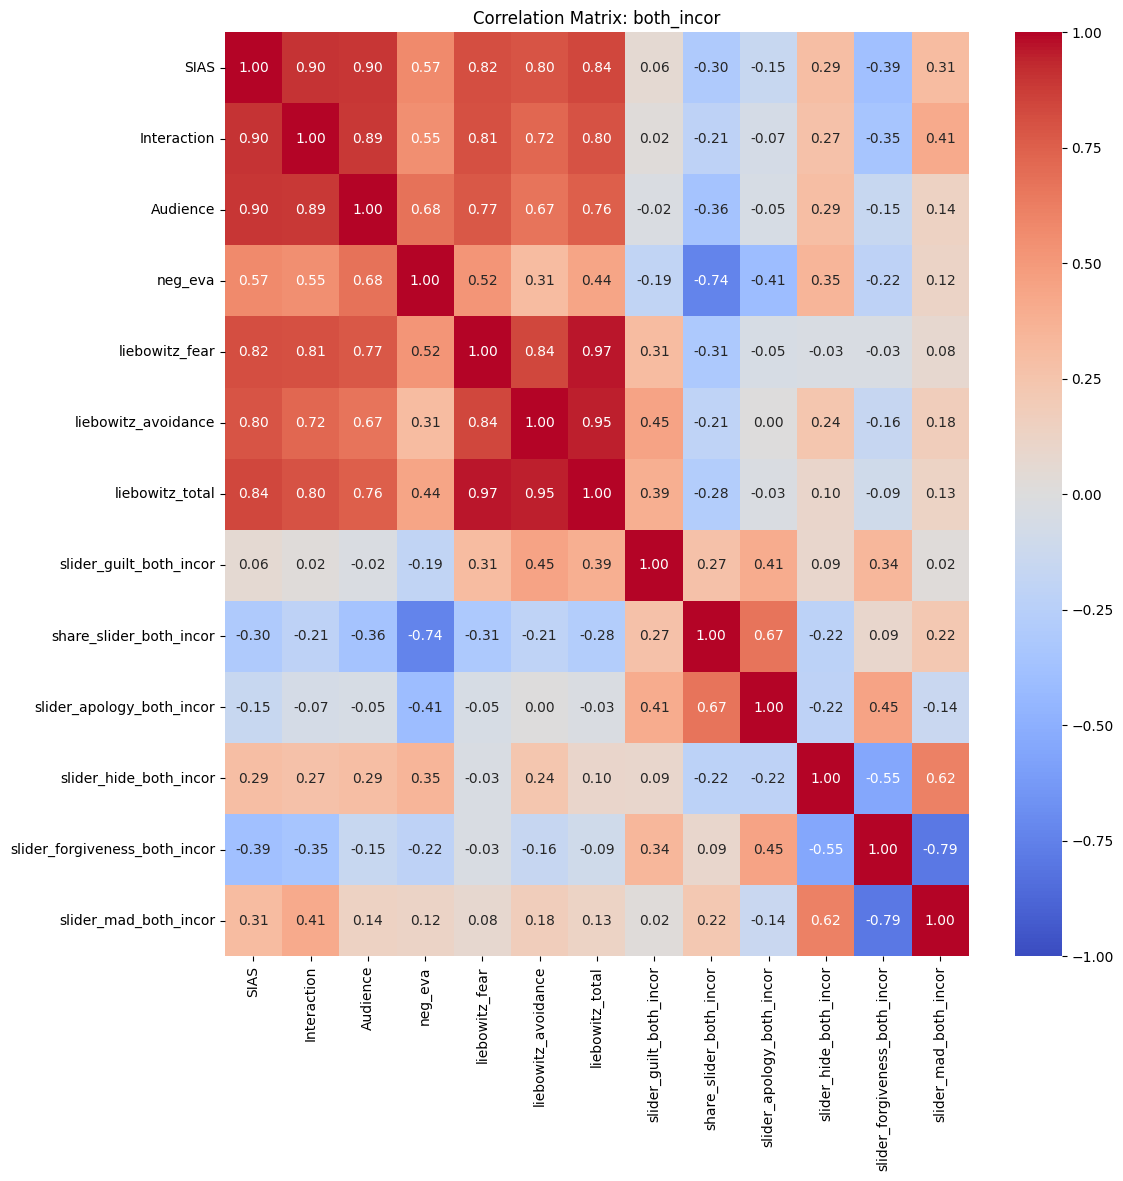

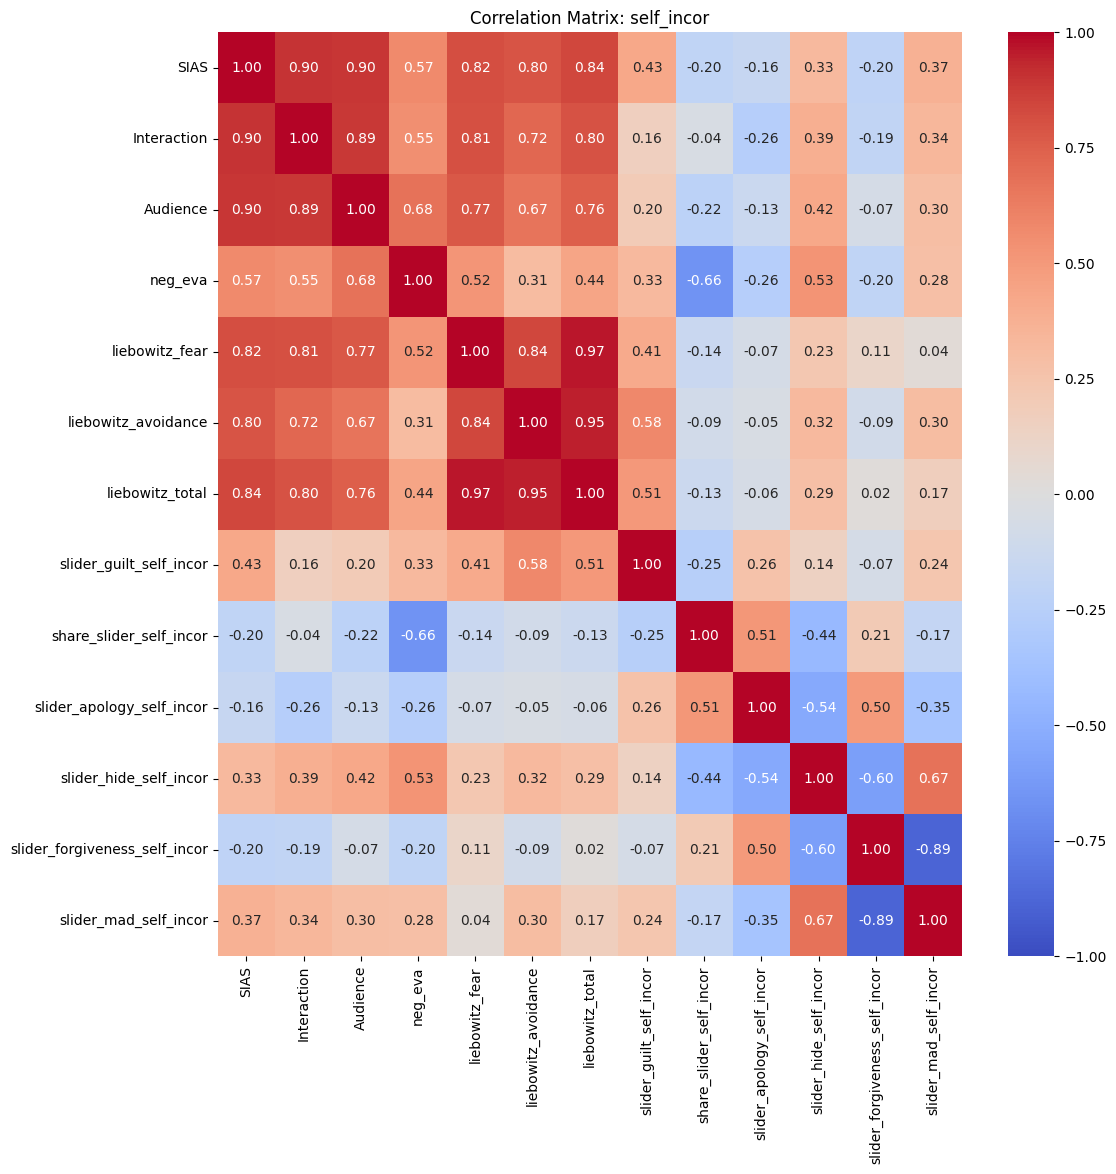

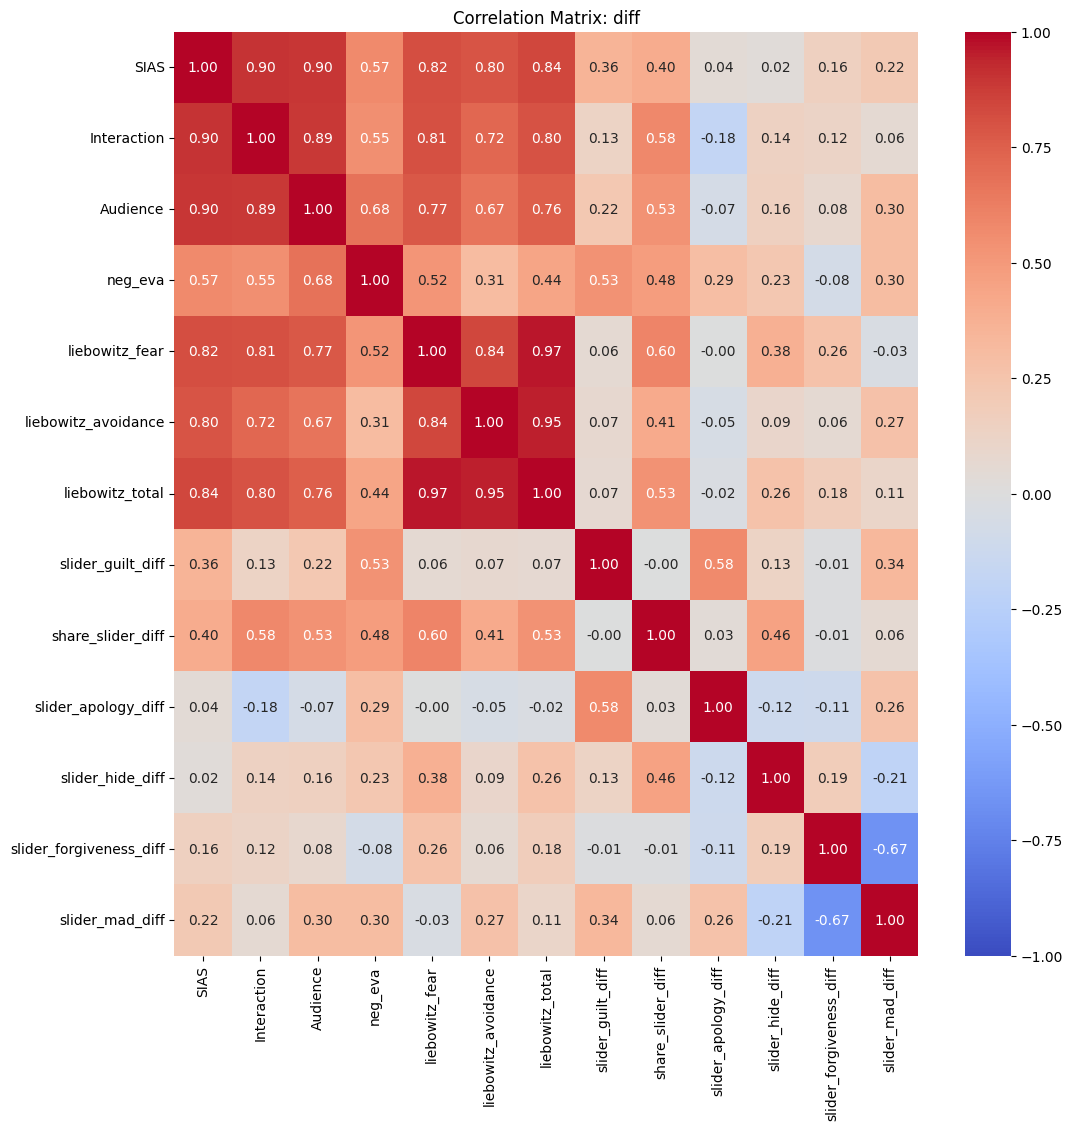

In [97]:
condtype = ['_both_incor', '_self_incor', '_diff']
for cond in condtype:
    # calculate scaleprefix2 and DVname correlation
    select_col = scaleprefix2 + [dv+cond for dv in DVname]
    # calculate the correlation matrix
    corrmax = df_wide_q[select_col].corr()
    plt.figure(figsize=(12, 12))
    # draw the heatmap, set color when r=0 to white
    sns.heatmap(corrmax, annot=True, fmt=".2f", cmap='coolwarm', center=0, vmin=-1, vmax=1)
    # add a title
    plt.title('Correlation Matrix: ' + cond[1:])
    plt.show()

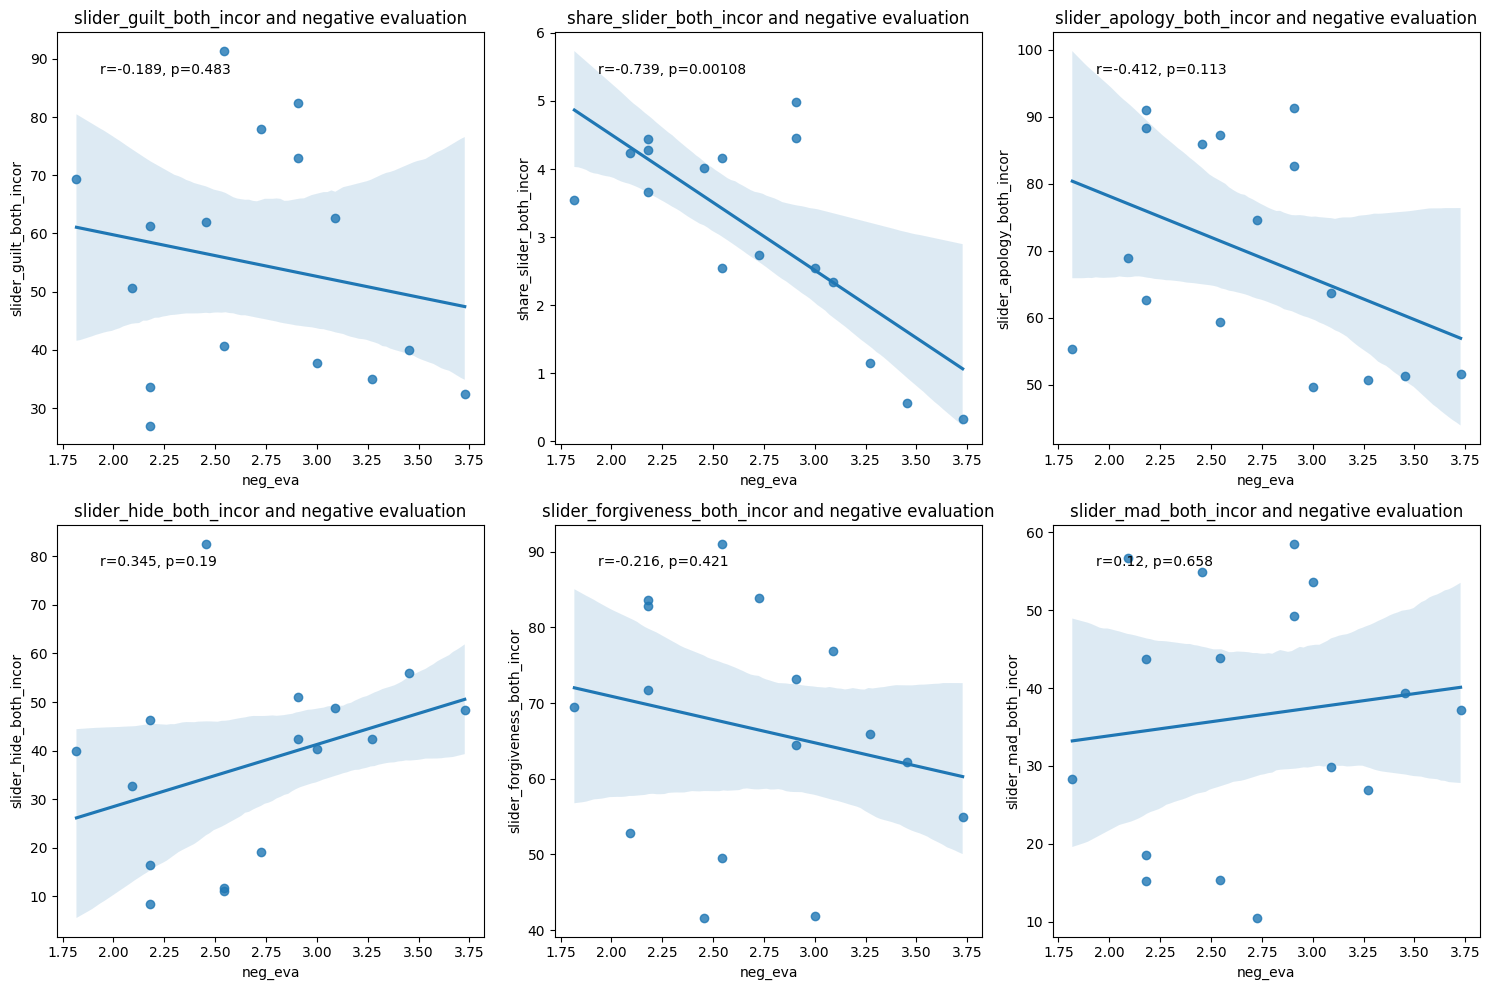

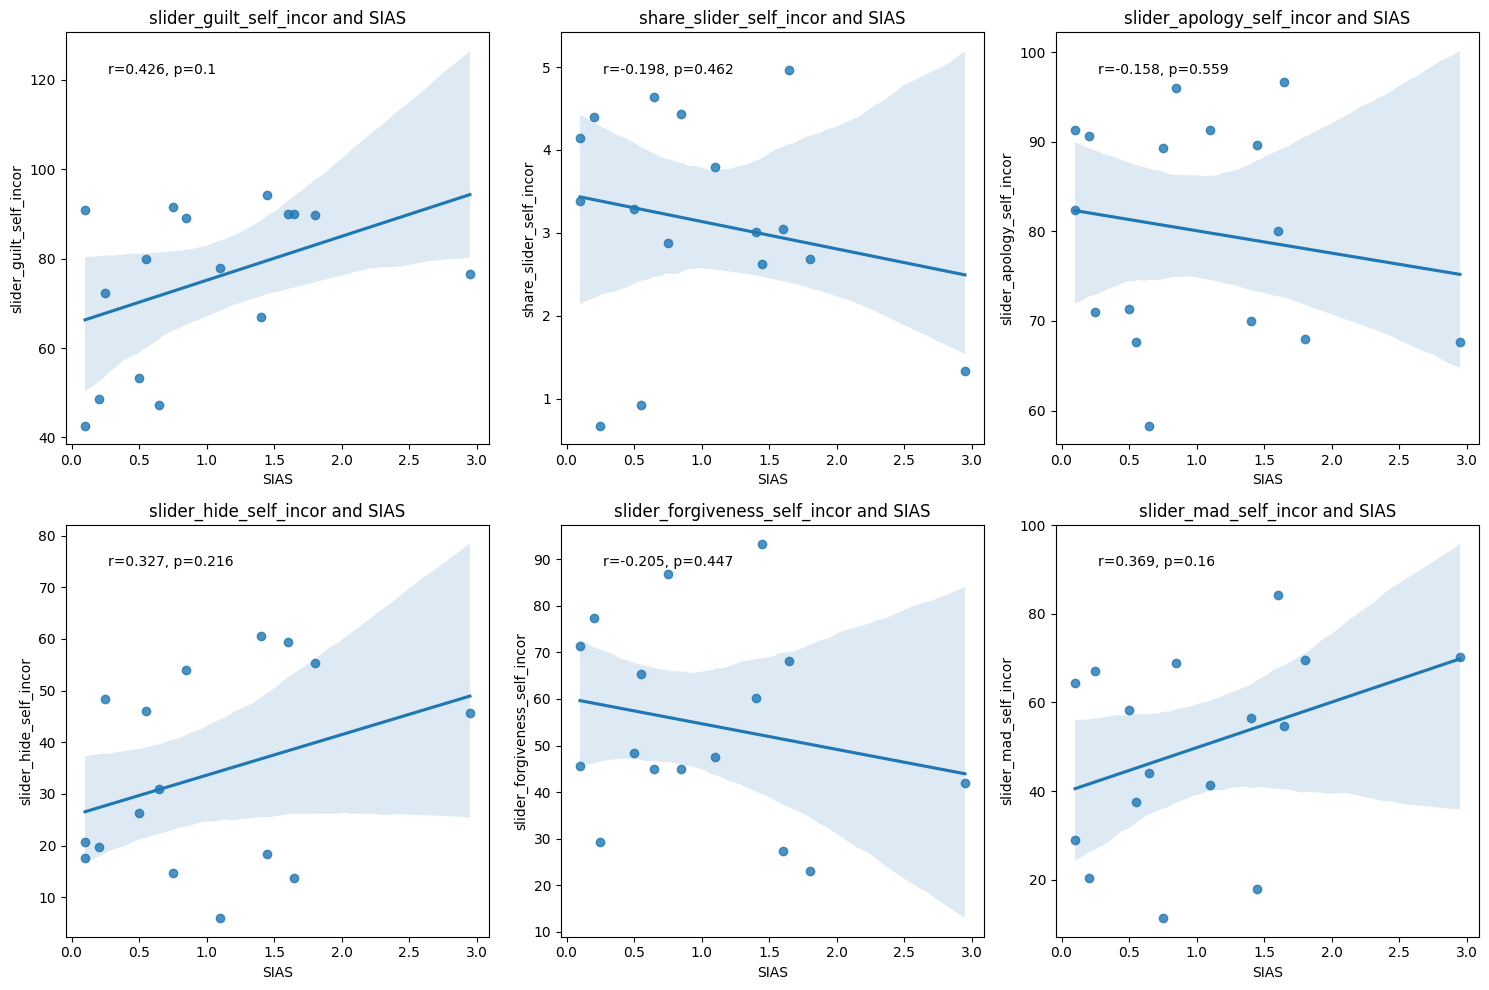

In [98]:
# plot the correlation between each dv and questionnaires
figure, axes = plt.subplots(2, 3, figsize=(15, 10))
dv_both_incor = [dv+'_both_incor' for dv in DVname]
for i, dv in enumerate(dv_both_incor):
    sns.regplot(y=dv, x='neg_eva', data=df_wide_q, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"{dv} and negative evaluation")
    # compute the correlation and significance level and put it on the plot
    [r, p] = pearsonr(df_wide_q[dv], df_wide_q['neg_eva'])
    axes[i//3, i%3].text(0.1, 0.9, f"r={r:.3}, p={p:.3}", transform=axes[i//3, i%3].transAxes)
plt.tight_layout()

# How about the correlation between each dv under the condition of self_incor and SIAS?
figure, axes = plt.subplots(2, 3, figsize=(15, 10))
dv_self_incor = [dv+'_self_incor' for dv in DVname]
for i, dv in enumerate(dv_self_incor):
    sns.regplot(y=dv, x='SIAS', data=df_wide_q, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"{dv} and SIAS")
    # compute the correlation and significance level and put it on the plot
    [r, p] = pearsonr(df_wide_q[dv], df_wide_q['SIAS'])
    axes[i//3, i%3].text(0.1, 0.9, f"r={r:.3}, p={p:.3}", transform=axes[i//3, i%3].transAxes)
plt.tight_layout()

# # plot the correlation between each dv and liebowitz
# figure, axes = plt.subplots(2, 3, figsize=(15, 10))
# for i, dv in enumerate(dv_diff):
#     sns.regplot(y=dv, x='liebowitz_total', data=df_wide_q, ax=axes[i//3, i%3])
#     axes[i//3, i%3].set_title(f"{dv} and liebowitz_total")

### Visualization: violin plot by condition

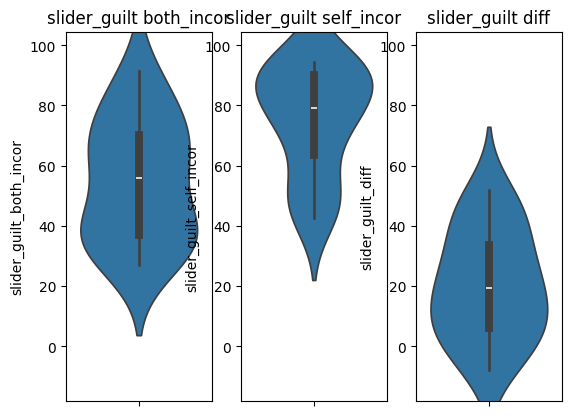

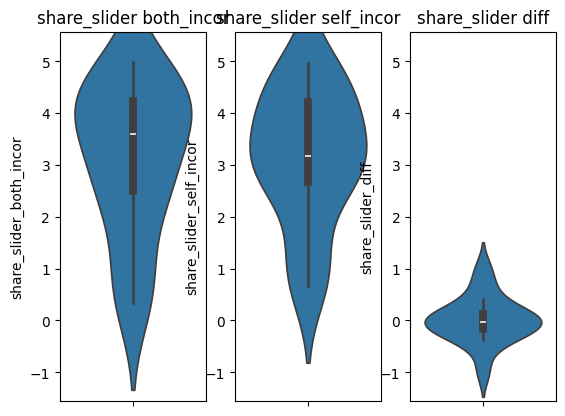

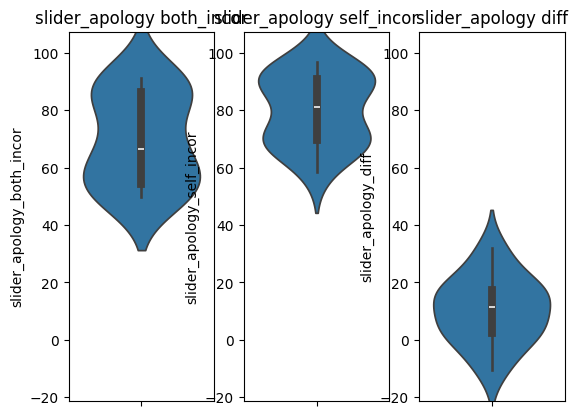

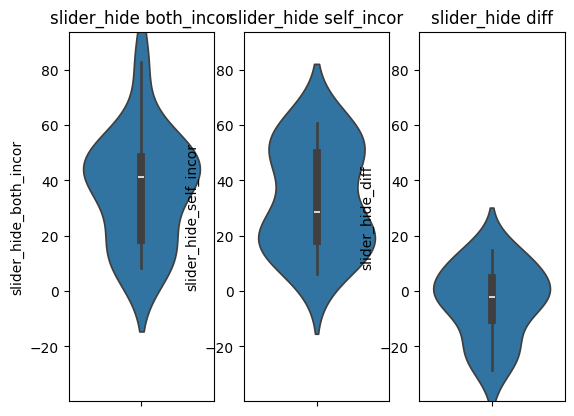

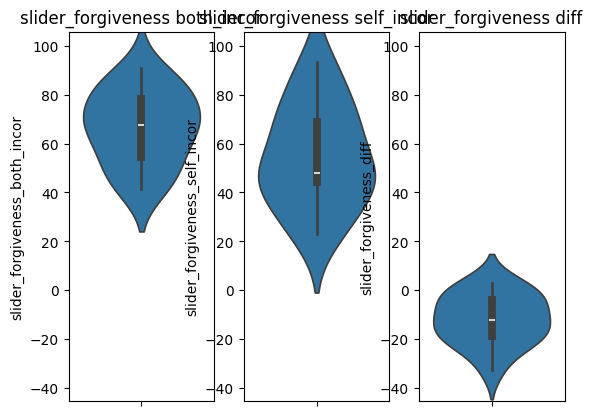

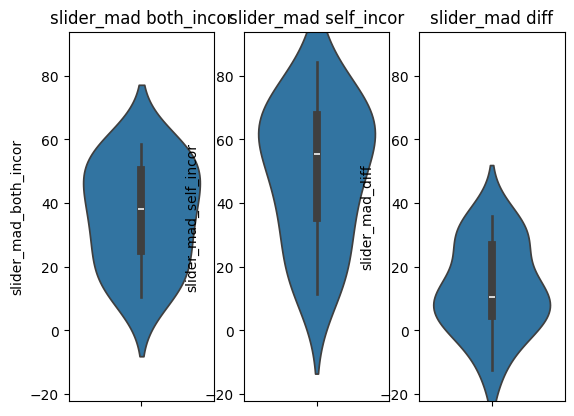

In [99]:
# visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# draw violin plot for each DV in 'both_incor' and 'self_incor' and '_diff', according to df_wide
for dv in DVname:
    # get the ylim
    ylim = df_wide[[dv+'_both_incor', dv+'_self_incor', dv+'_diff']].min().min(), df_wide[[dv+'_both_incor', dv+'_self_incor', dv+'_diff']].max().max()
    ylim = (ylim[0]-(ylim[1]-ylim[0])/10, ylim[1]+(ylim[1]-ylim[0])/10)

    plt.figure()
    # create a 1*3 subplot
    plt.subplot(1, 3, 1)
    sns.violinplot(y=dv+'_both_incor', data=df_wide)
    plt.title(f'{dv} both_incor')
    plt.ylim(ylim)

    plt.subplot(1, 3, 2)
    sns.violinplot(y=dv+'_self_incor', data=df_wide)
    plt.title(f'{dv} self_incor')
    plt.ylim(ylim)

    plt.subplot(1, 3, 3)
    sns.violinplot(y=dv+'_diff', data=df_wide)
    plt.title(f'{dv} diff')
    plt.ylim(ylim)
    plt.show()
    

## Facial trait task

In [100]:
def raw2long_trait(df, 
                   keep_columns=[],
                   DVname=[], 
                   have_attention_check=False, 
                   check_missing=False, 
                   drop_according=''):
    """
    Convert the DataFrame from wide to long format
    """
    # select columns
    colinterest = keep_columns + [col + '.response' for col in DVname] + [col + '.rt' for col in DVname]
    for col in colinterest:
        if col not in df.columns:
            df[col] = np.nan
    selectrow = df[colinterest]

    if have_attention_check:
        attention_check = selectrow.dropna(subset=['isCheck']).query("isCheck == 1")
        if attention_check['answer'].notnull().any():
            # in one version of this experiment, the answer is a random number
            acc = np.mean(np.logical_and(attention_check['slider_face_judge.response'] > attention_check['answer']-0.5,
                                         attention_check['slider_face_judge.response'] < attention_check['answer']+0.5))
        elif attention_check['isCheck'].notnull().any():
            # in one version of this experiment, we set the answer as 5
            acc = np.mean(np.logical_and(attention_check['slider_face_judge.response'] > 5-0.5,
                                         attention_check['slider_face_judge.response'] < 5+0.5))
        else:
            # in the early version of this experiment, there's no attention check
            acc = None

        if acc is None or acc < 0.8:
            if not selectrow.empty and 'participant' in selectrow.columns:
                print(f"Participant {selectrow['participant'].iloc[0]} acc = {acc} < 0.8 *****")
            df_long = []
            return df_long   

    session_trait = []
    if check_missing:
        if selectrow['slider_judge_img'].notnull().any():
            session_trait = [x for x in selectrow['slider_judge_img'].unique() if x is not np.nan]

    if len(session_trait) > 3: 
        if selectrow['isCheck'].notnull().any():
            df_long = selectrow.dropna(subset=[drop_according]).query('isCheck==0')
        else:
            df_long = selectrow.dropna(subset=[drop_according])
        
        if df_long.shape[0] == 200:
            df_long.loc[:49, 'slider_judge_img'] = session_trait[0]
            df_long.loc[50:99, 'slider_judge_img'] = session_trait[1]
            df_long.loc[100:149, 'slider_judge_img'] = session_trait[2]
            df_long.loc[150:, 'slider_judge_img'] = session_trait[3]
            df_long = df_long.dropna(subset=['slider_face_judge.response'])
            df_long = df_long.query('`slider_face_judge.rt` > 0.2 and `slider_face_judge.rt` < 10')
        else:
            print(f"Participant {df_long['participant'].iloc[0]} has less than 200 trials")
            df_long = []
    else:
        df_long = []

    return df_long


In [101]:
sub_info = ['participant', 'face_serial', 'isCheck', 'answer', \
            'session_serial', 'slider_judge_img', 'image_name']
exp_info = ['slider_face_judge']

# facial trait task
dfs_long = pd.DataFrame()
for df in dfs_trait:
    # Now we don't exlude any participants according to their performance in attention check
    df_long = raw2long_trait(df, 
                             keep_columns=sub_info,
                             DVname = exp_info,
                             have_attention_check = False, 
                             check_missing = True, 
                             drop_according='image_name')
    if len(df_long) > 0:
        # Append the new observation using pd.concat
        dfs_long = pd.concat([dfs_long, df_long], ignore_index=True)


In [102]:
dfs_long

,participant,face_serial,isCheck,answer,session_serial,slider_judge_img,image_name,slider_face_judge.response,slider_face_judge.rt
0,er3,49.0,0.0,0.0,NaN,friendly.png,image/49.jpg,6.037500,1.8030
1,er3,47.0,0.0,0.0,NaN,friendly.png,image/47.jpg,3.968750,2.0330
2,er3,29.0,0.0,0.0,NaN,friendly.png,image/29.jpg,1.950000,2.5130
3,er3,19.0,0.0,0.0,NaN,friendly.png,image/19.jpg,2.043750,1.9110
4,er3,50.0,0.0,0.0,NaN,friendly.png,image/50.jpg,5.975000,4.0520
...,...,...,...,...,...,...,...,...,...
3791,这是一个小天才,22.0,0.0,0.0,NaN,trustworthy.png,image/22.jpg,5.427778,2.5034
3792,这是一个小天才,48.0,0.0,0.0,NaN,trustworthy.png,image/48.jpg,4.538889,1.4899
3793,这是一个小天才,37.0,0.0,0.0,NaN,trustworthy.png,image/37.jpg,5.094445,1.4350
3794,这是一个小天才,50.0,0.0,0.0,NaN,trustworthy.png,image/50.jpg,4.005555,1.8460


In [103]:
# dfs_long['participant'].unique().__len__()
print(f"Number of participants in facial trait task: {dfs_long['participant'].unique().__len__()}")

Number of participants in facial trait task: 19


### transform to wide format

In [104]:
def long2wide_trait(df_long):
    # drop non response rows
    # df_long = df_long.dropna(subset=['slider_face_judge.response'])
    df_long.loc[:, 'trait'] = df_long['slider_judge_img'].apply(lambda x: x.split('.')[0])
    # calcualte the mean value for each trait
    df_long_mean = df_long.groupby(['participant', 'trait'])['slider_face_judge.response'].mean().reset_index()

    # convert long format data to wide format for facial trait task and calculate the mean value for each trait
    df_wide = df_long_mean.pivot(index='participant', 
                            columns='trait', 
                            values='slider_face_judge.response').reset_index()
    # print(df_wide.head(5))

    return df_wide

In [105]:
df_wide_trait = long2wide_trait(dfs_long)

In [106]:
df_wide_trait.head()

trait,participant,competent,critical,friendly,trustworthy
0,挽冬,3.790189,4.187077,3.843716,4.234904
1,er3,3.514583,3.500000,3.345213,3.914139
2,sppq,4.027259,3.708899,3.575663,3.802729
3,一 一,4.124445,4.289480,3.666549,4.082971
4,加多宝,3.254972,4.662478,2.795782,2.786244


### correlation between social anxiety and critical judgment

In [107]:
# find the common participants in df_wide_trait and df_qscores_excluded
df_wide_trait = df_wide_trait[df_wide_trait['participant'].isin(df_qscores['participantIDque'])]
df_qscores_excluded2 = df_qscores[df_qscores['participantIDque'].isin(df_wide_trait['participant'])]
print(f"Number of participants in df_wide_trait: {df_wide_trait['participant'].unique().__len__()}, in df_qscores_excluded2: {df_qscores_excluded2['participantIDque'].unique().__len__()}")

# rank
df_wide_trait = df_wide_trait.sort_values(by='participant')
df_qscores_excluded2 = df_qscores_excluded2.sort_values(by='participantIDque')

Number of participants in df_wide_trait: 18, in df_qscores_excluded2: 18


In [108]:
# correlation between facial trait and questionnaire
for scale in scaleprefix:
    print(f"Scale: {scale}")
    for trait in df_wide_trait.columns[1:]:
        [r, p] = pearsonr(df_wide_trait[trait], df_qscores_excluded2[scale])
        marker = '*' if p < 0.05 else ''
        print(f"    {trait} and {scale}: {r:.3}, p-value: {p:.3}{marker}")

Scale: SIAS
    competent and SIAS: -0.16, p-value: 0.527
    critical and SIAS: -0.281, p-value: 0.259
    friendly and SIAS: 0.0448, p-value: 0.86
    trustworthy and SIAS: -0.0442, p-value: 0.862
Scale: Interaction
    competent and Interaction: -0.35, p-value: 0.154
    critical and Interaction: -0.334, p-value: 0.175
    friendly and Interaction: -0.183, p-value: 0.468
    trustworthy and Interaction: -0.207, p-value: 0.41
Scale: Audience
    competent and Audience: -0.24, p-value: 0.338
    critical and Audience: -0.234, p-value: 0.349
    friendly and Audience: -0.0901, p-value: 0.722
    trustworthy and Audience: -0.12, p-value: 0.637
Scale: neg_eva
    competent and neg_eva: -0.35, p-value: 0.154
    critical and neg_eva: -0.433, p-value: 0.0727
    friendly and neg_eva: -0.148, p-value: 0.558
    trustworthy and neg_eva: -0.197, p-value: 0.434
Scale: liebowitz_fear
    competent and liebowitz_fear: -0.0348, p-value: 0.891
    critical and liebowitz_fear: -0.0744, p-value: 0.7

# Save data

In [109]:
import time
# get the current date
date = time.strftime("%m-%d", time.localtime())
date

# create a directory to save the data
savepath = os.path.join(rootpath, 'result')
if not os.path.exists(savepath):
    os.makedirs(savepath)

pre_survey_clean.to_csv(savepath+'revised_presurvey'+date+'.csv', index=False, encoding='utf_8_sig')

post_survey_clean.to_csv(savepath+'revised_postsurvey'+date+'.csv', index=False, encoding='utf_8_sig')
# guilt
# encoding='utf_8_sig' is to ensure that the Chinese characters will be saved properly
df_wide.to_csv(savepath+'/naodao_guilt_task_wide_'+date+'.csv', index=False, encoding='utf_8_sig')

# trait
df_wide_trait.to_csv(savepath+'/naodao_trait_task_wide_'+date+'.csv', index=False, encoding='utf_8_sig')